In [19]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'..\Data\processed\Merged_Advanced_Stats_2018_2019.csv')

In [20]:
pos_list = ['RB', 'QB', 'WR', 'TE']

In [21]:
df = df.loc[(df['pos'].isin(pos_list)) & (df['year'] == 2019)]

In [23]:
df['year'].value_counts()

2019    4001
Name: year, dtype: int64

In [24]:
df['pos'].value_counts()

WR    1740
RB    1094
TE     627
QB     540
Name: pos, dtype: int64

In [26]:
df.columns

Index(['player_id', 'player_name', 'pos', 'year', 'Date', 'Week', 'Age', 'Tm',
       'Home/Away', 'Opp', 'Result', 'Passing_Cmp', 'Passing_Att',
       'Passing_Yds', 'Passing_TD', 'Passing_Int', 'Passing_Rate',
       'Passing_Sk', 'Passing_Y/A', 'Passing_AY/A', 'Rushing_Att',
       'Rushing_Yds', 'Rushing_Y/A', 'Rushing_TD', 'Receiving_Tgt',
       'Receiving_Rec', 'Receiving_Yds', 'Receiving_Y/R', 'Receiving_TD',
       'Receiving_Y/Tgt', 'Scoring_2PM', 'Fumbles', 'Fumbles_Lost',
       'Rushing_1D', 'Rushing_YBC', 'Rushing_YAC', 'Rushing_BrkTkl',
       'Receiving_1D', 'Receiving_YBC', 'Receiving_YAC', 'Receiving_BrkTkl',
       'Receiving_Drop', 'Receiving_Drop%', 'Passing_1D', 'Passing_IAY',
       'Passing_CAY', 'Passing_YAC', 'Passing_Drops', 'Passing_BadTh',
       'Passing_Bltz', 'Passing_Hrry', 'Passing_Hits', 'Passing_Scrm',
       'std_scoring', 'ppr_scoring', 'half_ppr_scoring'],
      dtype='object')

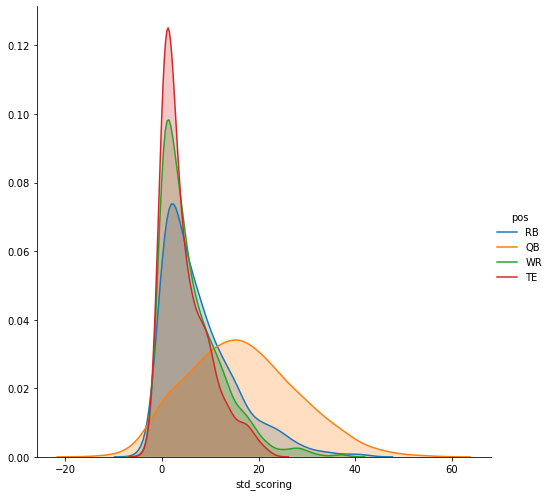

In [25]:
#Season Long Position Analysis (Standard Scoring)
g = (sns.FacetGrid(df, hue='pos', height=7)
.map(sns.kdeplot, 'std_scoring', shade=True)
.add_legend())

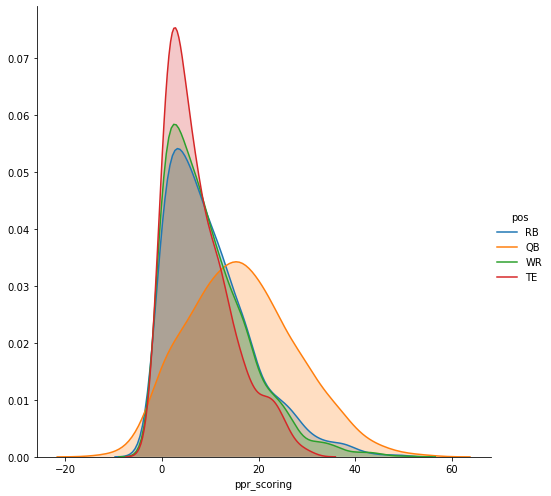

In [29]:
#Season Long Position Distribution (PPR Scoring)
g = (sns.FacetGrid(df, hue='pos', height=7)
.map(sns.kdeplot, 'ppr_scoring', shade=True)
.add_legend())

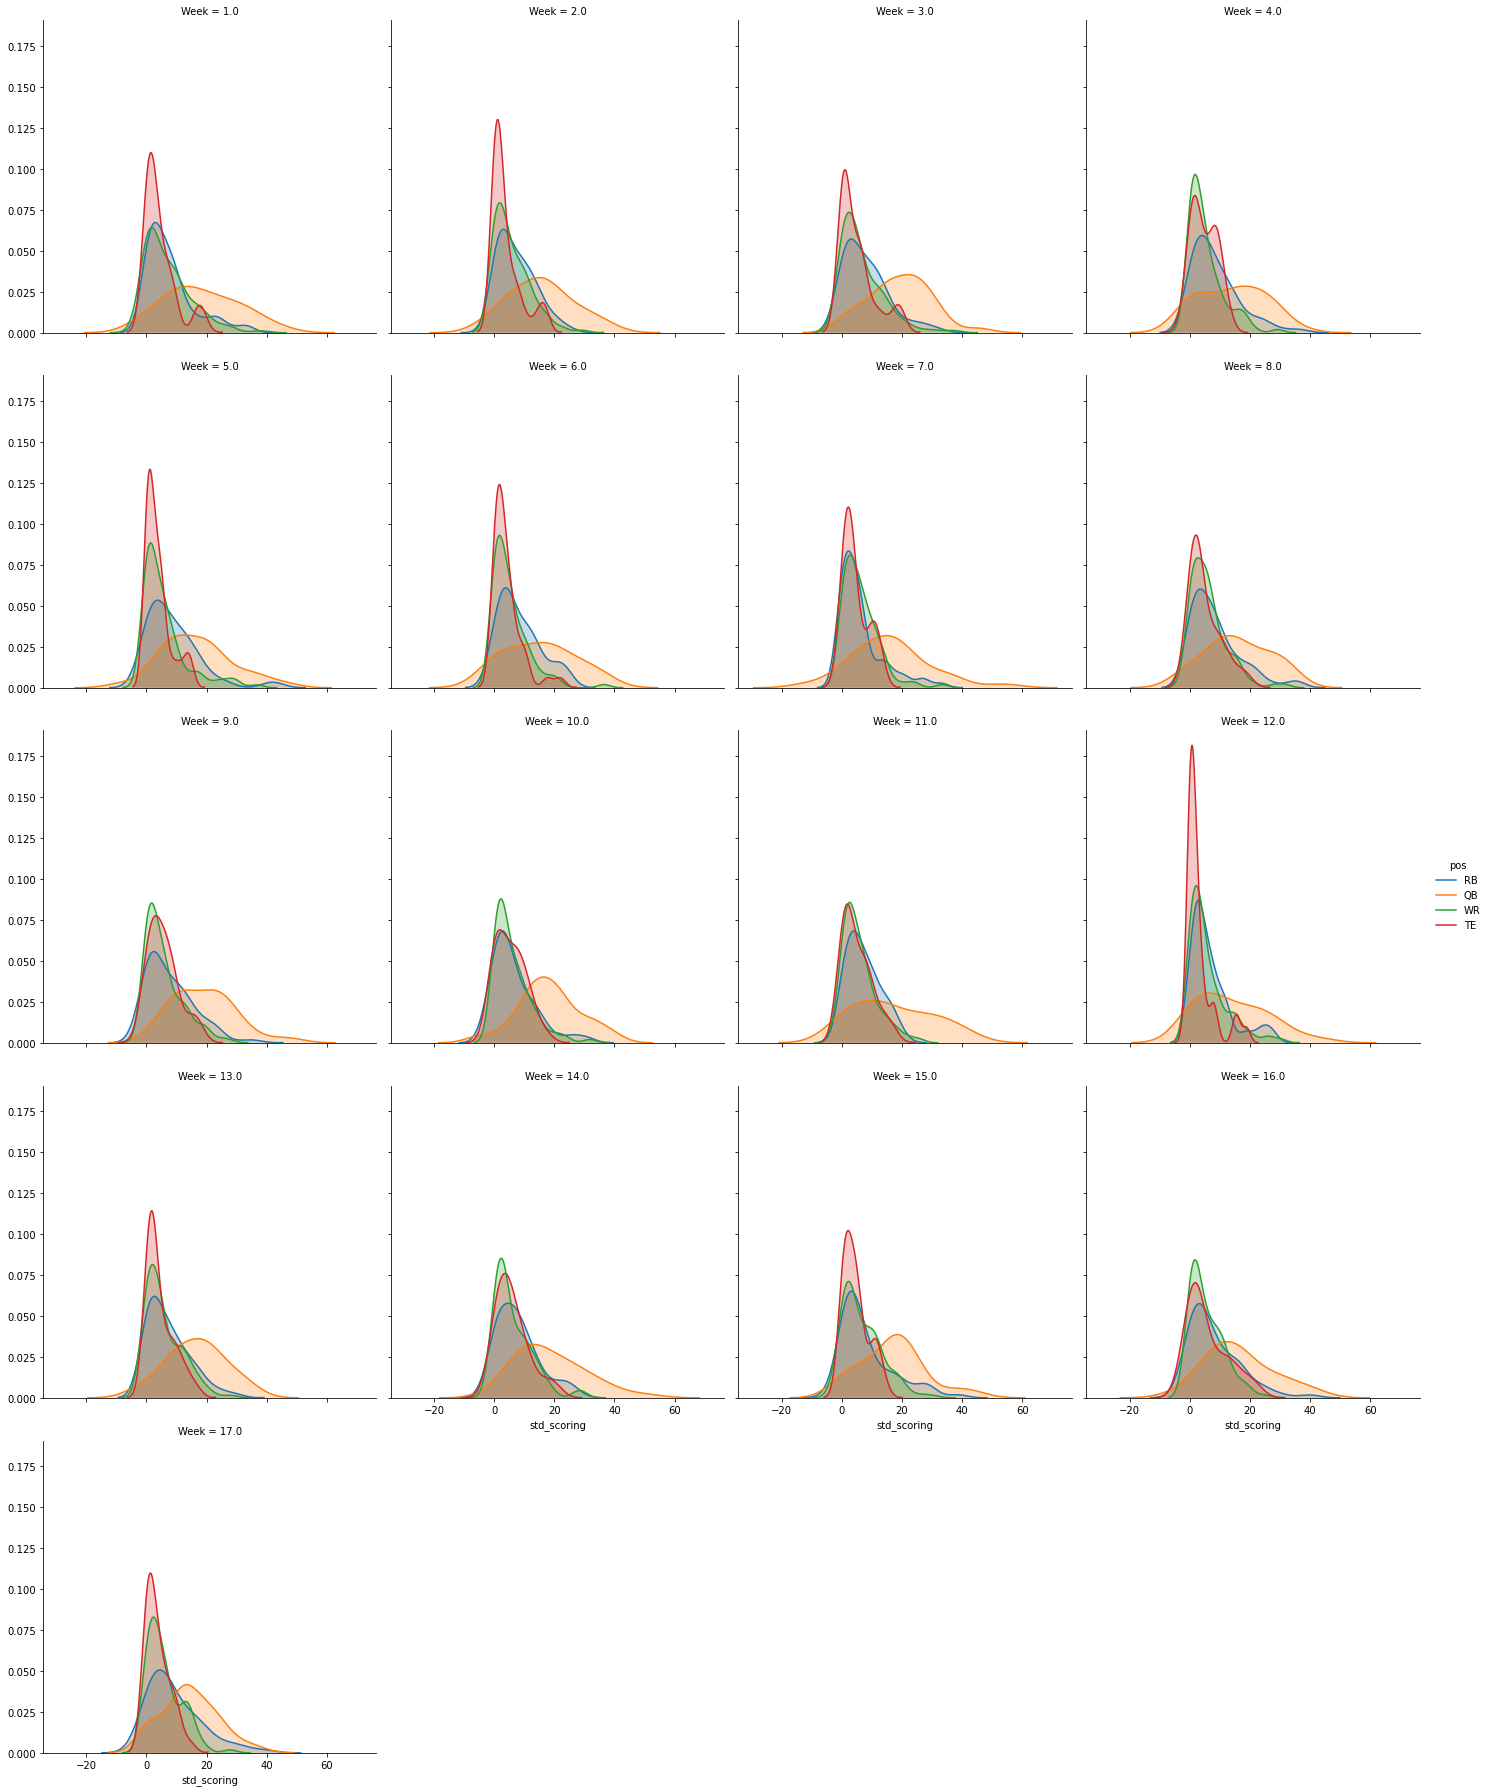

In [28]:
#Week by week posiitonal analysis (Standard Scoring)

g = (sns.FacetGrid(df, hue='pos', col='Week', col_wrap=4, height=5)
    .map(sns.kdeplot, 'std_scoring', shade=True)
    .add_legend())

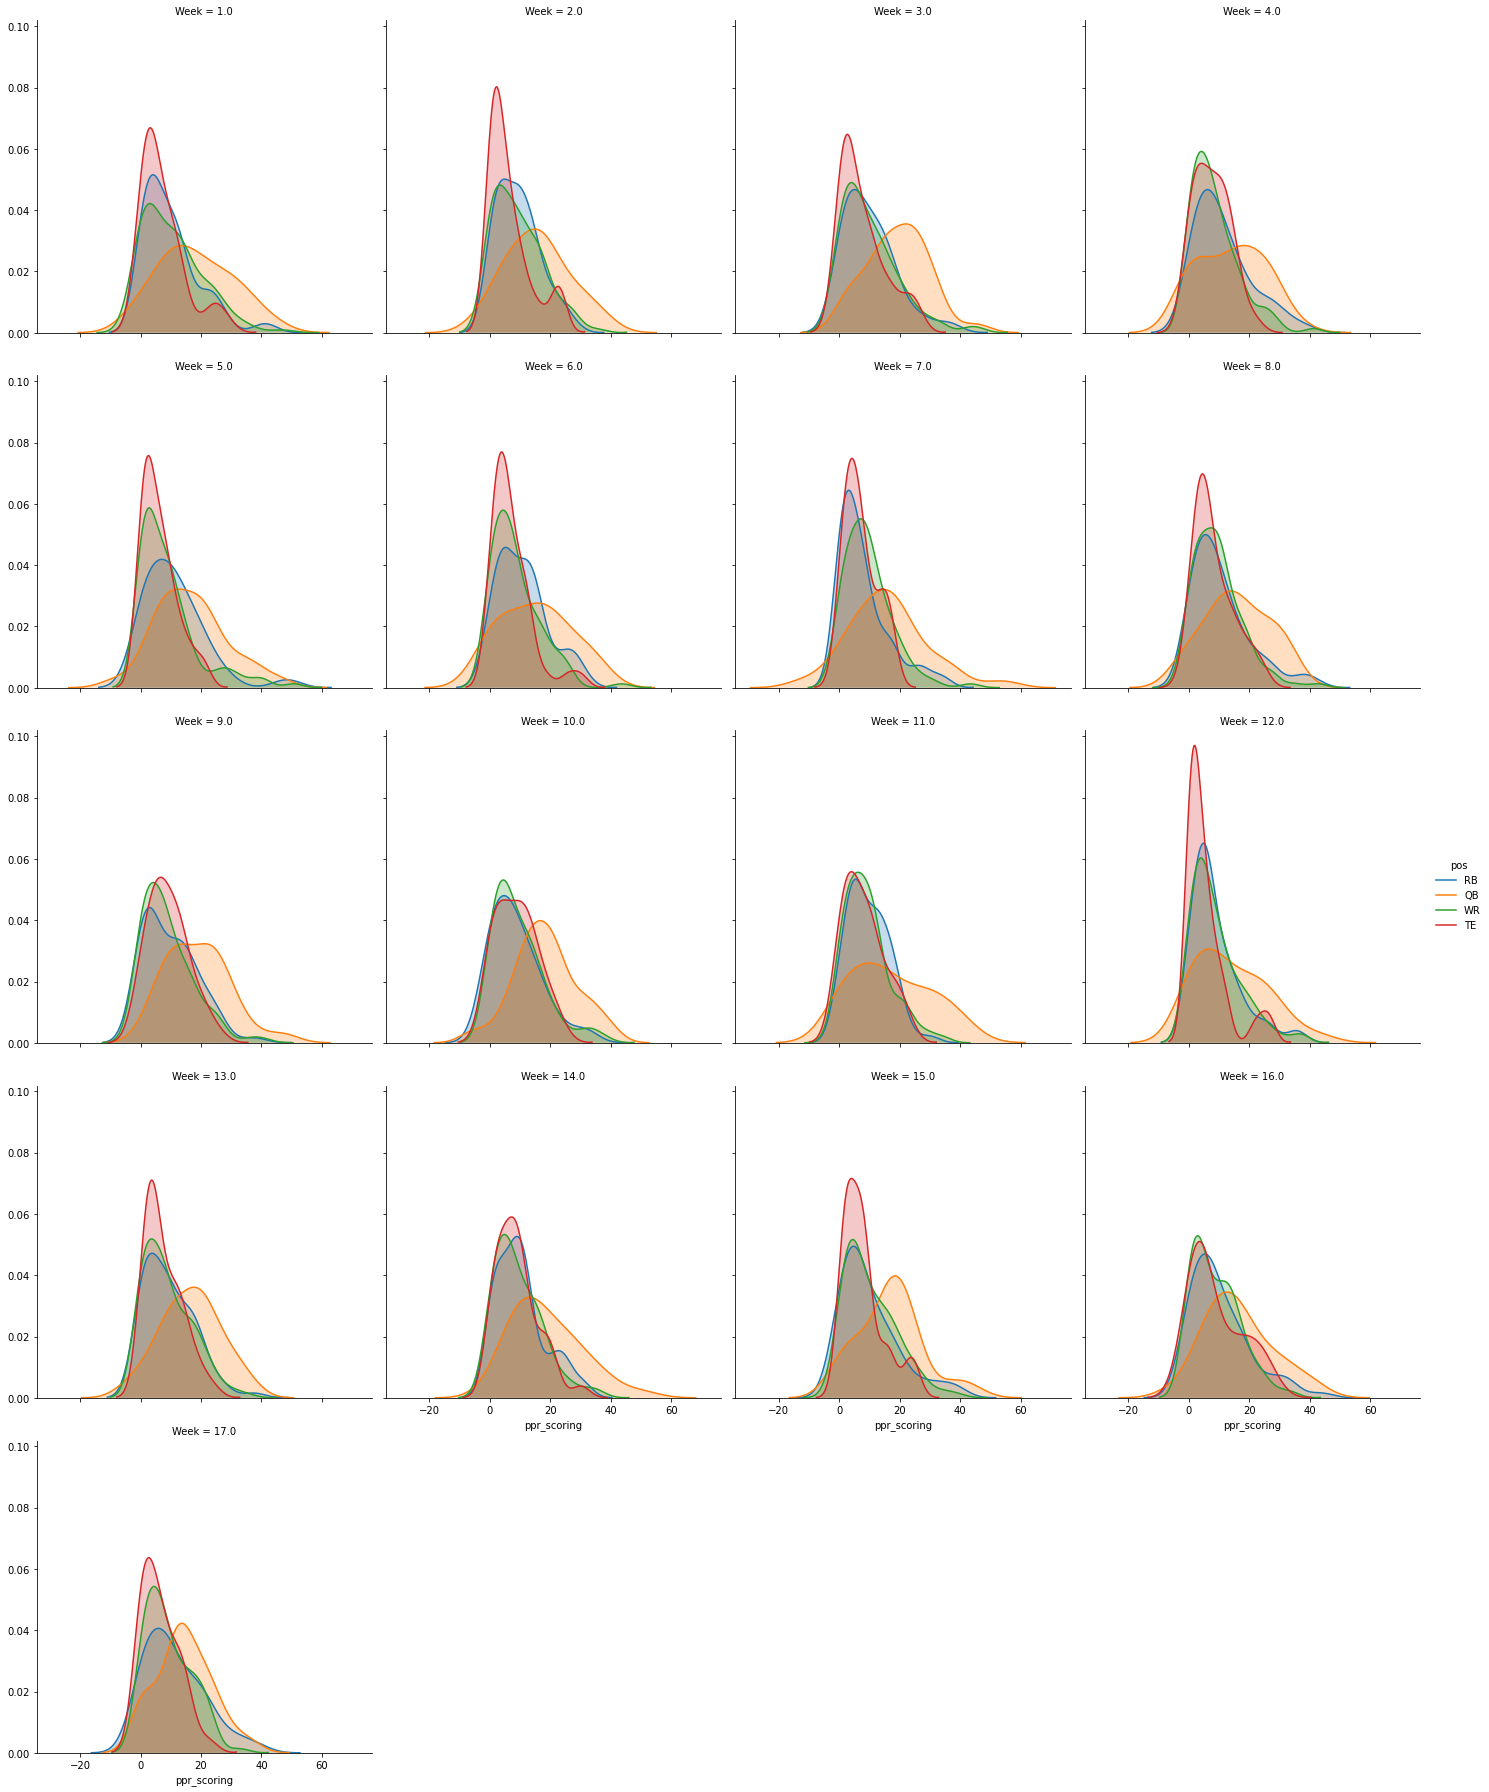

In [30]:
#Week By Week Position analysis (PPR Scoring)

g = (sns.FacetGrid(df, hue='pos', col='Week', col_wrap=4, height=5)
    .map(sns.kdeplot, 'ppr_scoring', shade=True)
    .add_legend())

In [36]:
scoring_df = df.melt(['player_id', 'Date', 'Week'], ['std_scoring', 'ppr_scoring', 'half_ppr_scoring'], var_name='Scoring_type', value_name='Fantasy_pts')
scoring_df.head()

,player_id,Date,Week,Scoring_type,Fantasy_pts
0,McCaCh01,2019-09-08,1.0,std_scoring,32.9
1,McCaCh01,2019-09-12,2.0,std_scoring,5.3
2,McCaCh01,2019-09-22,3.0,std_scoring,24.8
3,McCaCh01,2019-09-29,4.0,std_scoring,23.9
4,McCaCh01,2019-10-06,5.0,std_scoring,41.7


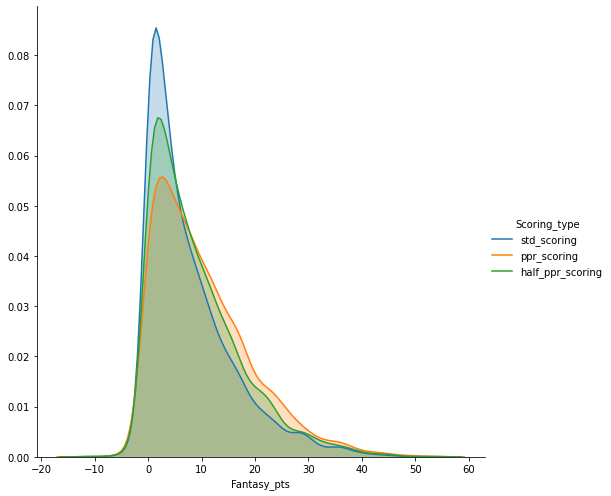

In [34]:
#Season Long Analysis (All scoring types)

g = (sns.FacetGrid(scoring_df, hue='Scoring_type', height=7)
.map(sns.kdeplot, 'Fantasy_pts', shade=True)
.add_legend())

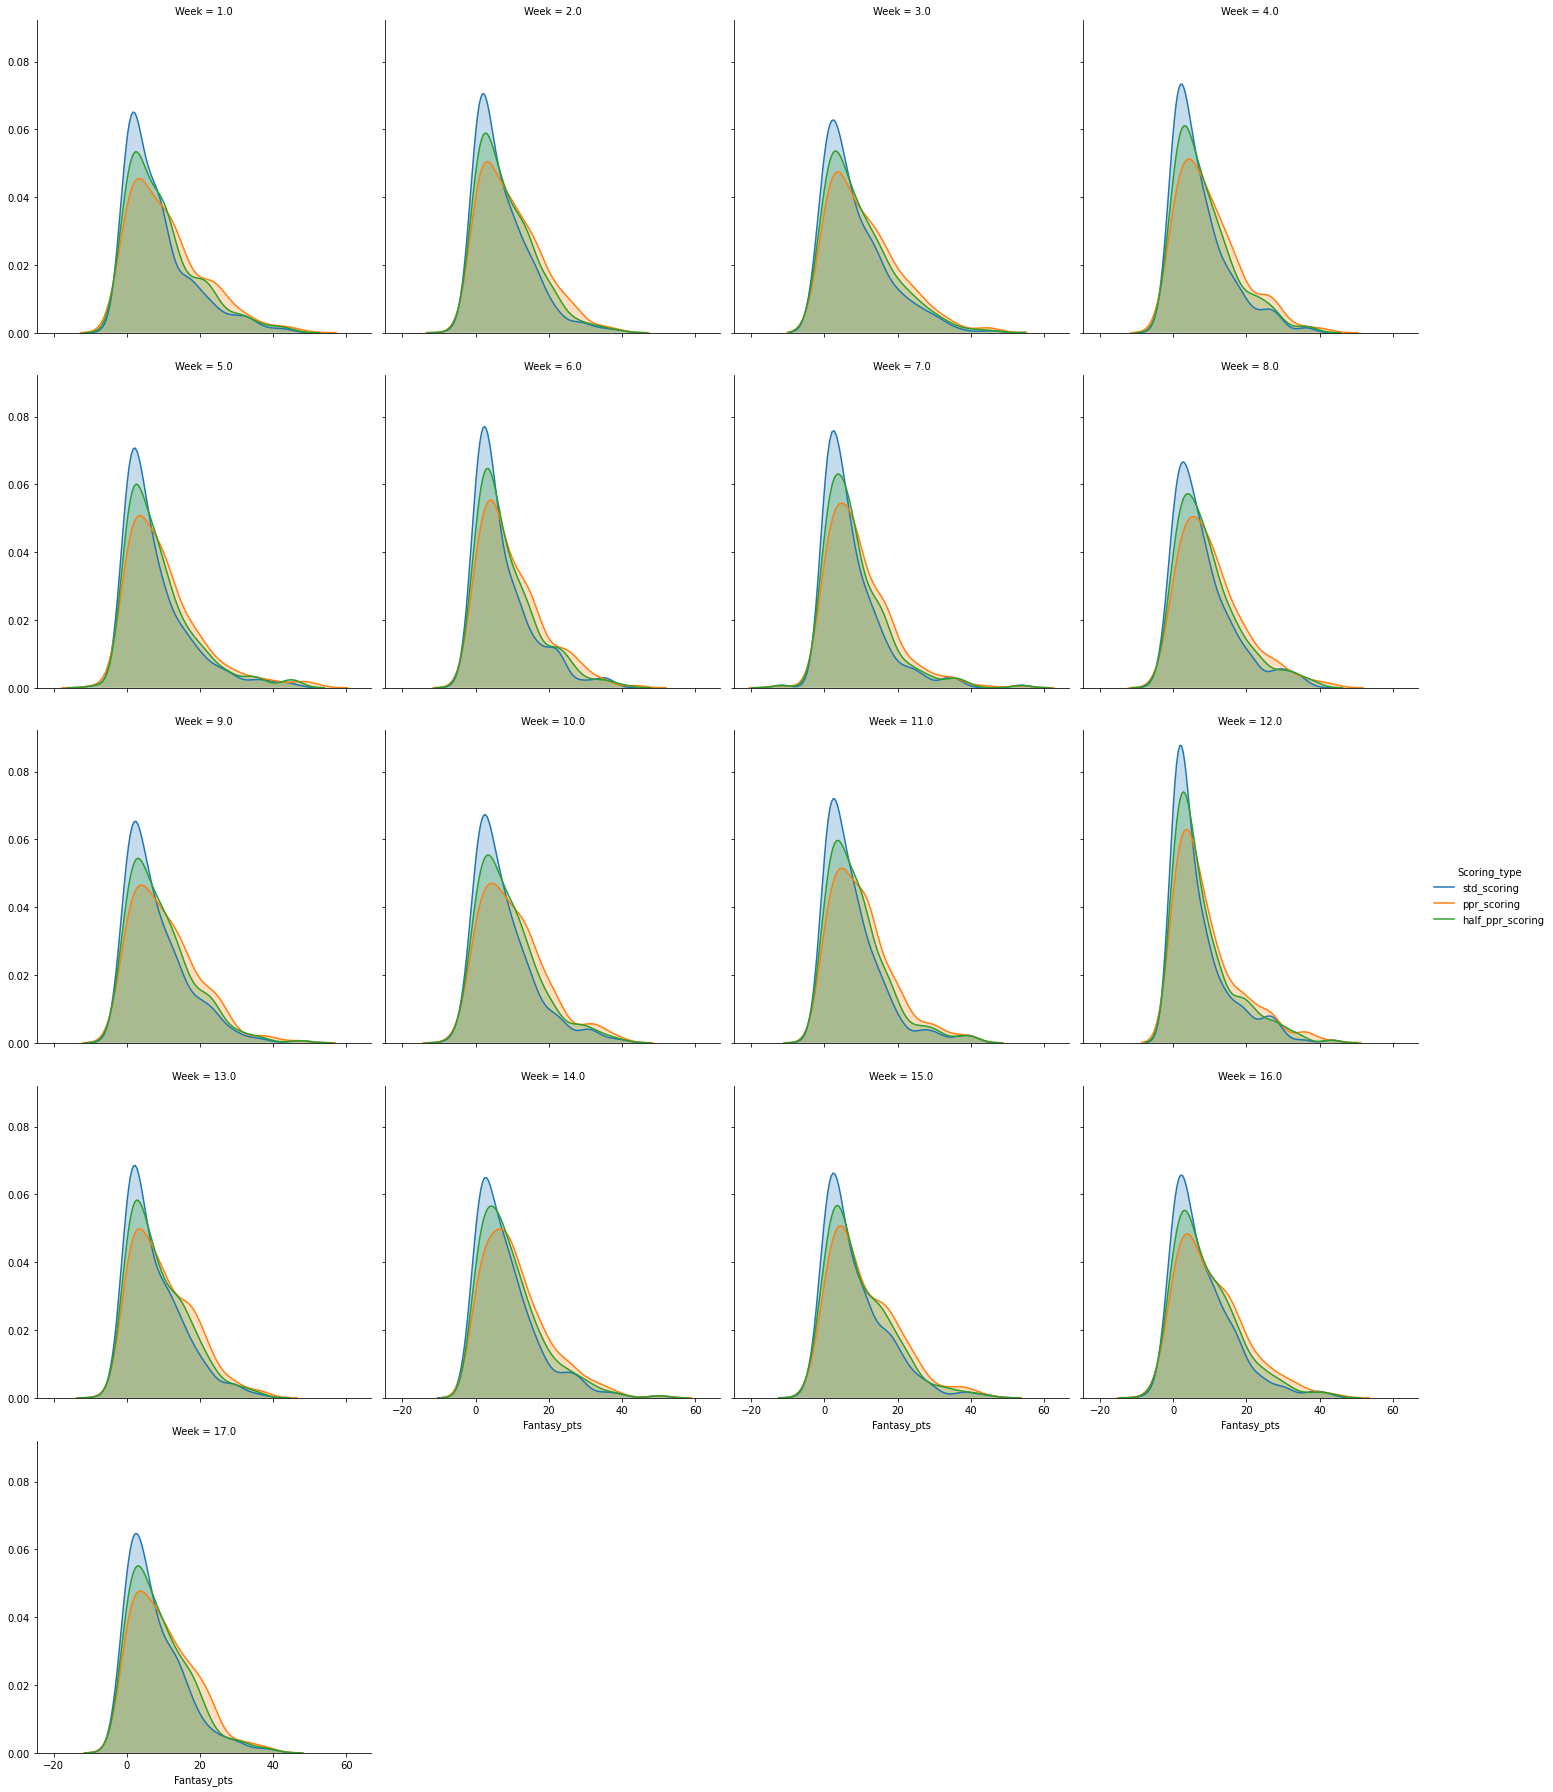

In [39]:
#Week by week Scoring analysis (PPR Scoring)

g = (sns.FacetGrid(scoring_df, hue='Scoring_type', col='Week', col_wrap=4, height=5)
    .map(sns.kdeplot, 'Fantasy_pts', shade=True)
    .add_legend())